In [4]:
import pandas as pd
import numpy as np

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [5]:
df = pd.read_csv("/content/Poem_classification - test_data.csv")
df.head()


,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."


In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   150 non-null    object
 1   Poem    150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


,0
Genre,0
Poem,0


In [7]:
df = df.dropna()


In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_poem'] = df['Poem'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Genre,Poem,clean_poem
0,Music,A woman walks by the bench I’m sitting onwith ...,woman walk bench sitting onwith dog look part ...
1,Music,"Because I am a boy, the untouchability of beau...",boy untouchability beautyis subject already bo...
2,Music,"Because today we did not leave this world,We n...",today leave world embody prominence within eve...
3,Music,"Big Bend has been here, been here. Shouldn’t i...",big bend say call mountain wall must river nev...
4,Music,"I put shells there, along the lip of the road....",put shell along lip road bivalve last summer d...


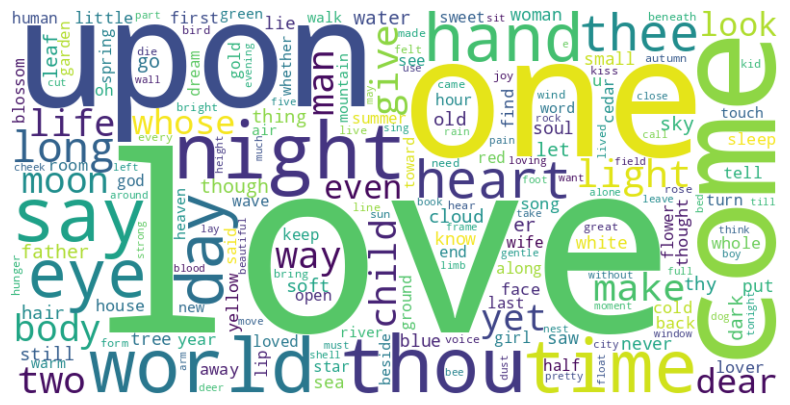

In [9]:
all_text = " ".join(df['clean_poem'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_text)

plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['Genre'])

df[['Genre', 'label']].drop_duplicates()

,Genre,label
0,Music,3
12,Death,1
25,Affection,0
125,Environment,2


In [11]:
X = df['clean_poem']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        ngram_range=(1,2)
    )),
    ('clf', LogisticRegression(max_iter=1000))
])


In [13]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000))])

In [14]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

   Affection       0.67      1.00      0.80        20
       Death       0.00      0.00      0.00         3
 Environment       0.00      0.00      0.00         5
       Music       0.00      0.00      0.00         2

    accuracy                           0.67        30
   macro avg       0.17      0.25      0.20        30
weighted avg       0.44      0.67      0.53        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
def predict_poem(poem):
    cleaned = clean_text(poem)
    pred = pipeline.predict([cleaned])[0]
    return le.inverse_transform([pred])[0]

sample_poem = "The sun sets quietly behind the hills"
print("Predicted Category:", predict_poem(sample_poem))


Predicted Category: Affection
